# Correlation between sample size and cs size

In [1]:
import polars as pl
from scipy.stats import pearsonr
from statsmodels import api as sm
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
dataset = pl.read_parquet("../../data/rescaled-betas.parquet")


In [3]:
data = dataset.select("nSamples", "credibleSetSize").filter(pl.col("nSamples").is_finite()).to_pandas()


In [4]:
pearsonr(data["nSamples"], data["credibleSetSize"])


PearsonRResult(statistic=0.012395740532563338, pvalue=1.3765759831430929e-89)

Very weak correlation between sample size and credible set size. The correlation is positive, but very weak.

In [5]:
x = data["nSamples"]
# y = np.log(data["credibleSetSize"]) + 1
y = data["credibleSetSize"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        credibleSetSize   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     402.8
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.38e-89
Time:                        01:46:13   Log-Likelihood:            -1.5464e+07
No. Observations:             2621048   AIC:                         3.093e+07
Df Residuals:                 2621046   BIC:                         3.093e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8897      0.056    440.865      0.0

The correlation R^2 is 0.00, which means that the variance in the cs size can be explained by sample size. This is a very low value, indicating that the two variables are not strongly related.

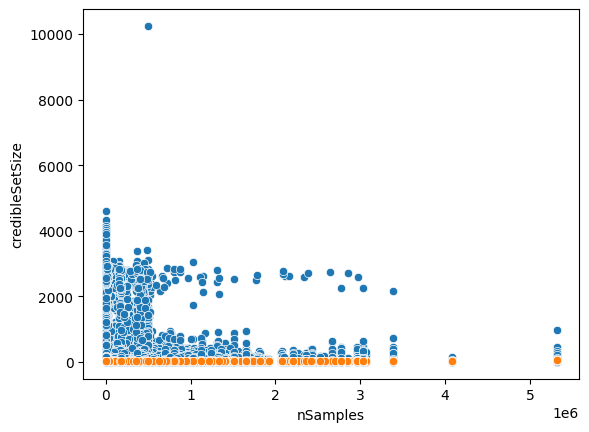

In [ ]:
sns.scatterplot(data=data, x="nSamples", y="credibleSetSize")
y_pred = model.predict(x)
sns.scatterplot(data=data, x="nSamples", y=y_pred)
plt.show()
